In [113]:
import pandas as pd
filepath = "./unified_results/"

In [114]:
nir_results = pd.read_csv(f"{filepath}nir_results.csv", index_col=0, encoding="utf8")
nir_results

,request_index,height,width,depth,fetched_item,time_to_fulfillment,elevator_idle_time,shuttle_idle_time,cumulative_height,total_cumulative_height,cumulative_depth,total_cumulative_depth,cumulative_time_to_fulfillment,total_cumulative_time_to_fulfillment,cumulative_elevator_idle_time,total_cumulative_elevator_idle_time,cumulative_shuttle_idle_time,total_cumulative_shuttle_idle_time
0,0,0,0,0,107.0,13.0,5.0,0.0,0,0,0,0,13.0,13.0,5.0,5.0,0.0,0.0
1,0,1,0,0,104.0,12.0,0.0,10.0,1,1,0,0,25.0,25.0,5.0,5.0,10.0,10.0
2,0,0,1,0,107.0,8.0,0.0,10.0,1,1,0,0,33.0,33.0,5.0,5.0,20.0,20.0
3,0,1,0,1,119.0,12.0,0.0,6.0,2,2,1,1,45.0,45.0,5.0,5.0,26.0,26.0
4,0,0,0,2,126.0,8.0,0.0,2.0,2,2,3,3,53.0,53.0,5.0,5.0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9,5,0,4,126.0,28.0,0.0,446.0,47,638,174,1952,485.0,5940.0,9.0,220.0,1386.0,18666.0
396,9,4,1,10,122.0,24.0,0.0,2.0,51,642,184,1962,509.0,5964.0,9.0,220.0,1388.0,18668.0
397,9,6,0,13,121.0,32.0,0.0,464.0,57,648,197,1975,541.0,5996.0,9.0,220.0,1852.0,19132.0
398,9,5,0,13,132.0,28.0,0.0,22.0,62,653,210,1988,569.0,6024.0,9.0,220.0,1874.0,19154.0


In [115]:
almog_results = pd.read_csv(f"{filepath}almog_results.csv", index_col=0, encoding="utf8")
almog_results

,request_index,height,width,depth,fetched_item,time_to_fulfillment,elevator_idle_time,shuttle_idle_time,cumulative_height,total_cumulative_height,cumulative_depth,total_cumulative_depth,cumulative_time_to_fulfillment,total_cumulative_time_to_fulfillment,cumulative_elevator_idle_time,total_cumulative_elevator_idle_time,cumulative_shuttle_idle_time,total_cumulative_shuttle_idle_time
0,0,3,0,0,104.0,20.0,0.0,1.0,3,3,0,0,20.0,20.0,0.0,0.0,1.0,1.0
1,0,0,0,2,126.0,8.0,0.0,7.0,3,3,2,2,28.0,28.0,0.0,0.0,8.0,8.0
2,0,1,0,6,105.0,12.0,0.0,1.0,4,4,8,8,40.0,40.0,0.0,0.0,9.0,9.0
3,0,0,0,0,107.0,8.0,0.0,10.0,4,4,8,8,48.0,48.0,0.0,0.0,19.0,19.0
4,0,1,0,1,119.0,12.0,0.0,6.0,5,5,9,9,60.0,60.0,0.0,0.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9,5,0,13,132.0,28.0,0.0,421.0,52,680,193,1997,496.0,5910.0,0.0,22.0,1304.0,17522.0
396,9,4,0,10,122.0,24.0,0.0,2.0,56,684,203,2007,520.0,5934.0,0.0,22.0,1306.0,17524.0
397,9,5,0,4,126.0,28.0,0.0,26.0,61,689,207,2011,548.0,5962.0,0.0,22.0,1332.0,17550.0
398,9,4,1,10,122.0,24.0,0.0,2.0,65,693,217,2021,572.0,5986.0,0.0,22.0,1334.0,17552.0


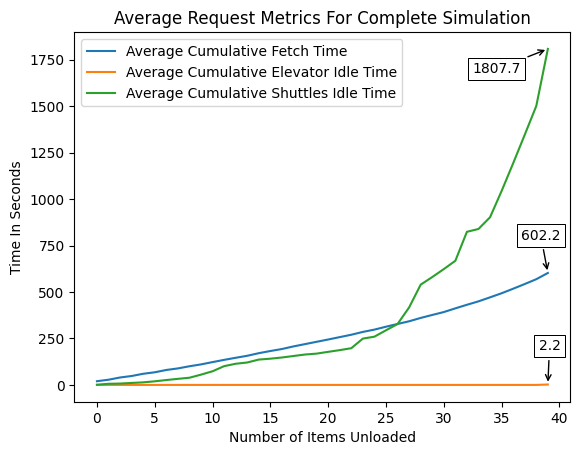

In [116]:
import numpy as np
import matplotlib.pyplot as plt
column_name = 'Number of Items Unloaded'
items_axis_values = [n for n in range(40)]
repeating_item_numbers_by_fetch = pd.DataFrame({column_name: np.tile(items_axis_values, 10)})
cumulative_results = almog_results[["cumulative_time_to_fulfillment", "cumulative_elevator_idle_time", "cumulative_shuttle_idle_time"]].join(repeating_item_numbers_by_fetch)
# ax = (almog_results[["cumulative_time_to_fulfillment", "cumulative_elevator_idle_time", "total_cumulative_shuttle_idle_time"]]).plot()
average_results = cumulative_results.groupby(column_name).mean().rename(
    columns={
        "cumulative_time_to_fulfillment": "Average Cumulative Fetch Time",
        "cumulative_elevator_idle_time": "Average Cumulative Elevator Idle Time",
        "cumulative_shuttle_idle_time": "Average Cumulative Shuttles Idle Time"
    }
)
average_results
ax = average_results.plot.line(
    title="Average Request Metrics For Complete Simulation",
    ylabel="Time In Seconds"
)

def annot_max(x,y, ax=None, xytext=(0.5,0.5)):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= str(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

items_axis_array = np.array(items_axis_values)
fetch_time_values_array = average_results[["Average Cumulative Fetch Time"]].to_numpy()
elevator_idle_time_values_array = average_results[["Average Cumulative Elevator Idle Time"]].to_numpy()
shuttle_idle_time_values_array = average_results[["Average Cumulative Shuttles Idle Time"]].to_numpy()

annot_max(items_axis_array, fetch_time_values_array, ax, (0.98,0.45))
annot_max(items_axis_array, elevator_idle_time_values_array, ax, (0.98,0.15))
annot_max(items_axis_array, shuttle_idle_time_values_array, ax, (0.9,0.9))

In [117]:
columns = nir_results.columns.tolist()
nir_relevant_data = nir_results.drop(columns=columns[0]).add_prefix('nir_')
almog_relevant_data = almog_results.drop(columns=columns[0]).add_prefix('almog_')
all_data = nir_relevant_data.join(almog_relevant_data)
all_data_columns = all_data.columns.tolist()
all_data

,nir_height,nir_width,nir_depth,nir_fetched_item,nir_time_to_fulfillment,nir_elevator_idle_time,nir_shuttle_idle_time,nir_cumulative_height,nir_total_cumulative_height,nir_cumulative_depth,...,almog_cumulative_height,almog_total_cumulative_height,almog_cumulative_depth,almog_total_cumulative_depth,almog_cumulative_time_to_fulfillment,almog_total_cumulative_time_to_fulfillment,almog_cumulative_elevator_idle_time,almog_total_cumulative_elevator_idle_time,almog_cumulative_shuttle_idle_time,almog_total_cumulative_shuttle_idle_time
0,0,0,0,107.0,13.0,5.0,0.0,0,0,0,...,3,3,0,0,20.0,20.0,0.0,0.0,1.0,1.0
1,1,0,0,104.0,12.0,0.0,10.0,1,1,0,...,3,3,2,2,28.0,28.0,0.0,0.0,8.0,8.0
2,0,1,0,107.0,8.0,0.0,10.0,1,1,0,...,4,4,8,8,40.0,40.0,0.0,0.0,9.0,9.0
3,1,0,1,119.0,12.0,0.0,6.0,2,2,1,...,4,4,8,8,48.0,48.0,0.0,0.0,19.0,19.0
4,0,0,2,126.0,8.0,0.0,2.0,2,2,3,...,5,5,9,9,60.0,60.0,0.0,0.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,5,0,4,126.0,28.0,0.0,446.0,47,638,174,...,52,680,193,1997,496.0,5910.0,0.0,22.0,1304.0,17522.0
396,4,1,10,122.0,24.0,0.0,2.0,51,642,184,...,56,684,203,2007,520.0,5934.0,0.0,22.0,1306.0,17524.0
397,6,0,13,121.0,32.0,0.0,464.0,57,648,197,...,61,689,207,2011,548.0,5962.0,0.0,22.0,1332.0,17550.0
398,5,0,13,132.0,28.0,0.0,22.0,62,653,210,...,65,693,217,2021,572.0,5986.0,0.0,22.0,1334.0,17552.0


,nir_time_to_fulfillment,nir_cumulative_time_to_fulfillment,nir_total_cumulative_time_to_fulfillment,almog_time_to_fulfillment,almog_cumulative_time_to_fulfillment,almog_total_cumulative_time_to_fulfillment
0,13.0,13.0,13.0,20.0,20.0,20.0
1,12.0,25.0,25.0,8.0,28.0,28.0
2,8.0,33.0,33.0,12.0,40.0,40.0
3,12.0,45.0,45.0,8.0,48.0,48.0
4,8.0,53.0,53.0,12.0,60.0,60.0
...,...,...,...,...,...,...
395,28.0,485.0,5940.0,28.0,496.0,5910.0
396,24.0,509.0,5964.0,24.0,520.0,5934.0
397,32.0,541.0,5996.0,28.0,548.0,5962.0
398,28.0,569.0,6024.0,24.0,572.0,5986.0


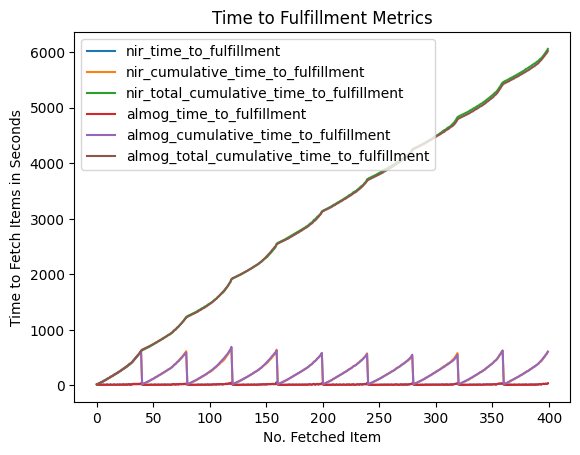

In [118]:
time_to_fulfillment_data = all_data[[col for col in all_data_columns if "fulfillment" in col]]
time_to_fulfillment_data.plot.line(
    title="Time to Fulfillment Metrics",
    ylabel="Time to Fetch Items in Seconds",
    xlabel="No. Fetched Item"
)
time_to_fulfillment_data

,nir_elevator_idle_time,nir_cumulative_elevator_idle_time,nir_total_cumulative_elevator_idle_time,almog_elevator_idle_time,almog_cumulative_elevator_idle_time,almog_total_cumulative_elevator_idle_time
0,5.0,5.0,5.0,0.0,0.0,0.0
1,0.0,5.0,5.0,0.0,0.0,0.0
2,0.0,5.0,5.0,0.0,0.0,0.0
3,0.0,5.0,5.0,0.0,0.0,0.0
4,0.0,5.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...
395,0.0,9.0,220.0,0.0,0.0,22.0
396,0.0,9.0,220.0,0.0,0.0,22.0
397,0.0,9.0,220.0,0.0,0.0,22.0
398,0.0,9.0,220.0,0.0,0.0,22.0


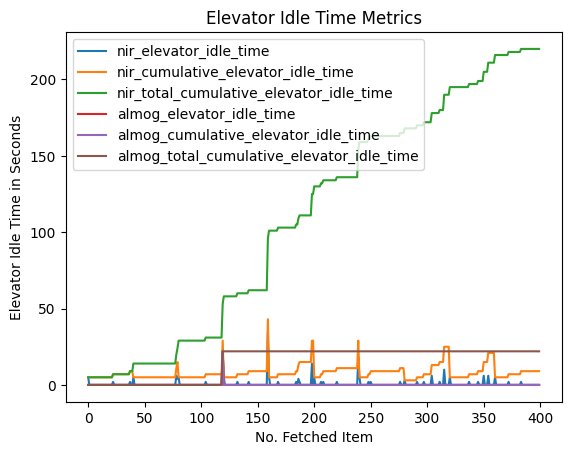

In [119]:
elevator_data = all_data[[col for col in all_data_columns if "elevator" in col]]
elevator_data.plot.line(
    title="Elevator Idle Time Metrics",
    ylabel="Elevator Idle Time in Seconds",
    xlabel="No. Fetched Item"
)
elevator_data

,nir_shuttle_idle_time,nir_cumulative_shuttle_idle_time,nir_total_cumulative_shuttle_idle_time,almog_shuttle_idle_time,almog_cumulative_shuttle_idle_time,almog_total_cumulative_shuttle_idle_time
0,0.0,0.0,0.0,1.0,1.0,1.0
1,10.0,10.0,10.0,7.0,8.0,8.0
2,10.0,20.0,20.0,1.0,9.0,9.0
3,6.0,26.0,26.0,10.0,19.0,19.0
4,2.0,28.0,28.0,6.0,25.0,25.0
...,...,...,...,...,...,...
395,446.0,1386.0,18666.0,421.0,1304.0,17522.0
396,2.0,1388.0,18668.0,2.0,1306.0,17524.0
397,464.0,1852.0,19132.0,26.0,1332.0,17550.0
398,22.0,1874.0,19154.0,2.0,1334.0,17552.0


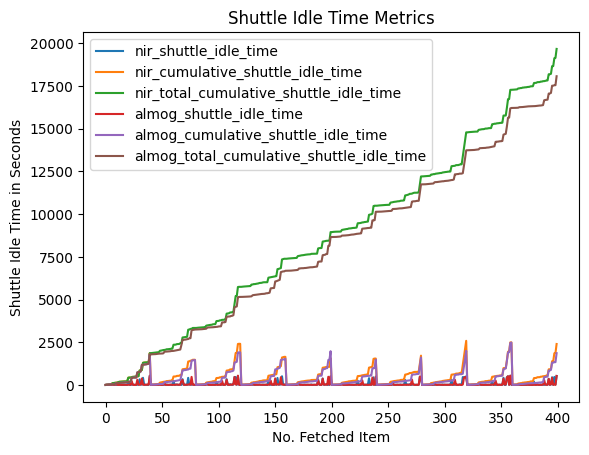

In [120]:
shuttle_data = all_data[[col for col in all_data_columns if "shuttle" in col]]
shuttle_data.plot.line(
    title="Shuttle Idle Time Metrics",
    ylabel="Shuttle Idle Time in Seconds",
    xlabel="No. Fetched Item"
)
shuttle_data

<AxesSubplot: title={'center': 'Floors Elevator Climbed by Items Fetched'}, xlabel='No. Fetched Item', ylabel='Number of Floors'>

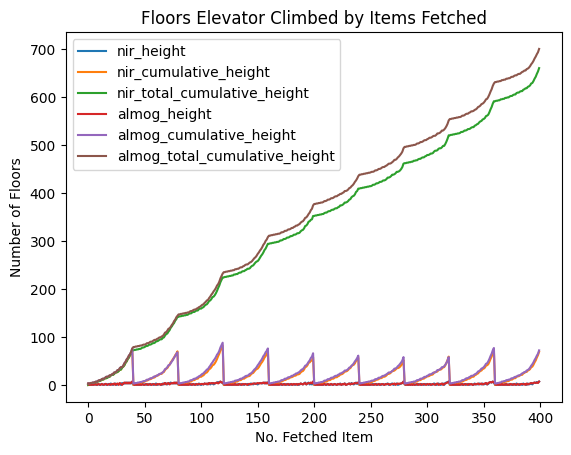

In [121]:
height_data = all_data[[col for col in all_data_columns if "height" in col]]
height_data.plot.line(
    title="Floors Elevator Climbed by Items Fetched",
    ylabel="Number of Floors",
    xlabel="No. Fetched Item"
)

,nir_depth,nir_cumulative_depth,nir_total_cumulative_depth,almog_depth,almog_cumulative_depth,almog_total_cumulative_depth
0,0,0,0,0,0,0
1,0,0,0,2,2,2
2,0,0,0,6,8,8
3,1,1,1,0,8,8
4,2,3,3,1,9,9
...,...,...,...,...,...,...
395,4,174,1952,13,193,1997
396,10,184,1962,10,203,2007
397,13,197,1975,4,207,2011
398,13,210,1988,10,217,2021


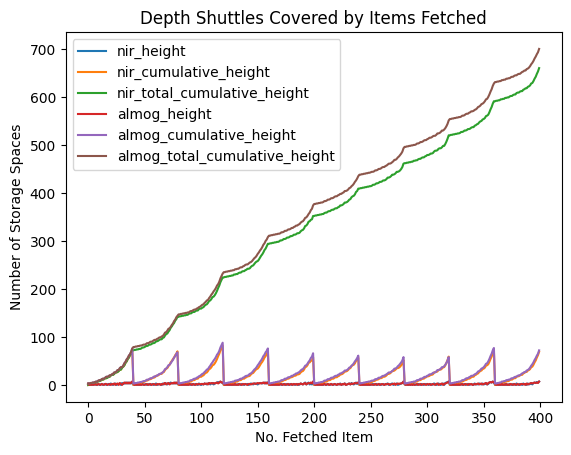

In [122]:
depth_data = all_data[[col for col in all_data_columns if "depth" in col]]
height_data.plot.line(
    title="Depth Shuttles Covered by Items Fetched",
    ylabel="Number of Storage Spaces",
    xlabel="No. Fetched Item"
)
depth_data

,Nir,Almog
0,55,52
1,41,41
2,33,33
3,32,31
4,33,31
5,36,31
6,39,48
7,23,25
8,21,20
9,24,27


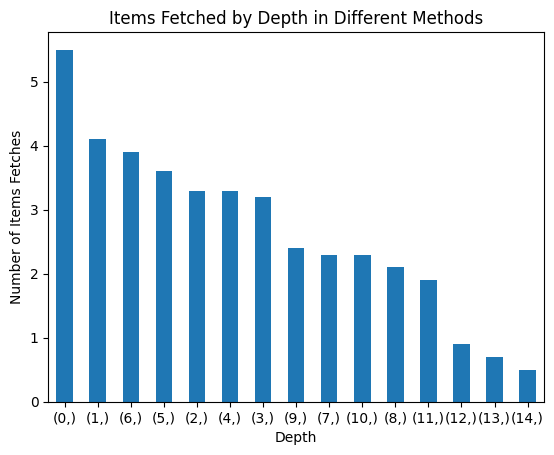

In [128]:
nir_depth_data_by_value_counts = depth_data[["nir_depth"]].value_counts()
almog_depth_data_by_value_counts = depth_data[["almog_depth"]].value_counts()
depth_data_by_value_counts = pd.concat([nir_depth_data_by_value_counts, almog_depth_data_by_value_counts], axis=1).sort_index()
depth_data_by_value_counts = depth_data_by_value_counts.rename(columns={0: "Nir", 1: "Almog"})
depth_data_by_value_counts.plot.bar(
    title="Items Fetched by Depth in Different Methods",
    xlabel="Depth",
    ylabel="Number of Items Fetches",
    rot=0
)
depth_data_by_value_counts

<AxesSubplot: title={'center': 'Average Number of Items Fetched by Depth'}, xlabel='Depth', ylabel='Number of Items Fetches'>

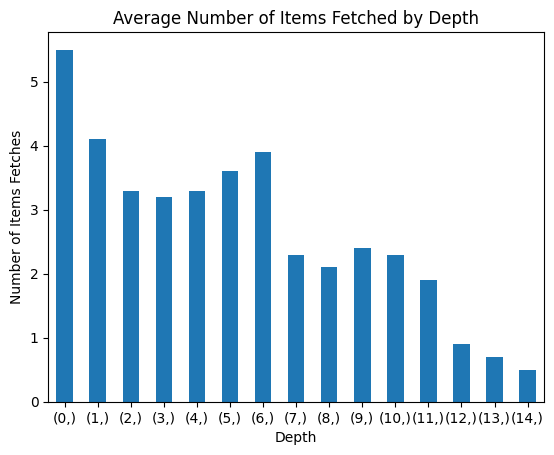

In [131]:
nir_depth_data_by_value_counts = (depth_data[["nir_depth"]].value_counts()/10).sort_index()
nir_depth_data_by_value_counts.plot.bar(
    title="Average Number of Items Fetched by Depth",
    xlabel="Depth",
    ylabel="Number of Items Fetches",
    rot=0
)

,Nir,Almog
0,109,98
1,122,110
2,72,82
3,46,58
4,17,23
5,23,21
6,4,1
7,7,7


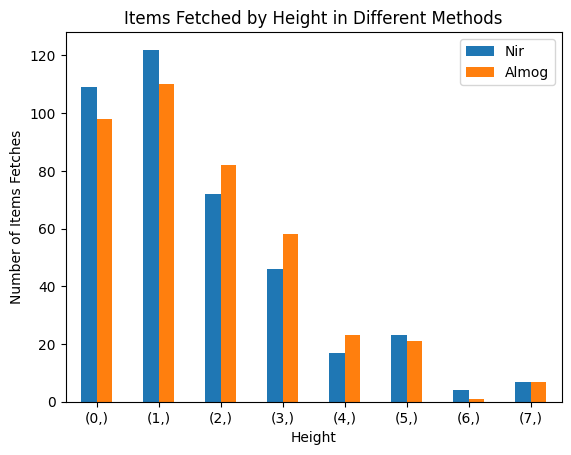

In [124]:
nir_height_data_by_value_counts = height_data[["nir_height"]].value_counts()
almog_height_data_by_value_counts = height_data[["almog_height"]].value_counts()
height_data_by_value_counts = pd.concat([nir_height_data_by_value_counts, almog_height_data_by_value_counts], axis=1).sort_index()
height_data_by_value_counts = height_data_by_value_counts.rename(columns={0: "Nir", 1: "Almog"})
height_data_by_value_counts.plot.bar(
    title="Items Fetched by Height in Different Methods",
    xlabel="Height",
    ylabel="Number of Items Fetches",
    rot=0
)
height_data_by_value_counts

<AxesSubplot: title={'center': 'Average Number of Items Fetched by Height'}, xlabel='Height', ylabel='Number of Items Fetches'>

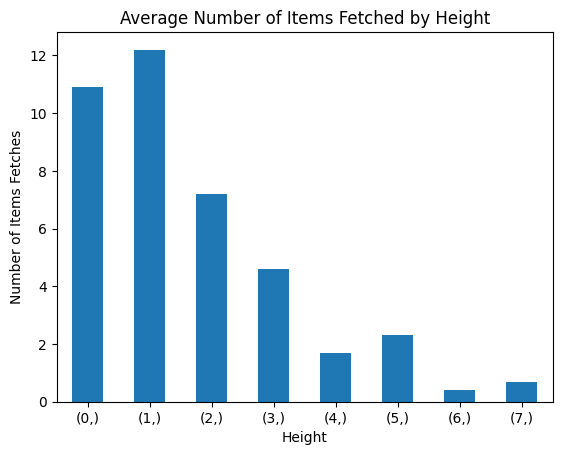

In [132]:
nir_height_data_by_value_counts = (height_data[["nir_height"]].value_counts()/10).sort_index()
nir_height_data_by_value_counts.plot.bar(
    title="Average Number of Items Fetched by Height",
    xlabel="Height",
    ylabel="Number of Items Fetches",
    rot=0
)